In [18]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy.optimize as opt
from scipy.optimize import fmin_tnc
from sklearn.datasets import load_iris

### References
##### https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
##### https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24

# Data

In [19]:
iris = load_iris()
iris_data = iris.data

In [20]:
iris_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [21]:
dataset = pd.DataFrame(iris.data, columns = iris.feature_names)
dataset['target'] = iris.target

In [22]:
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


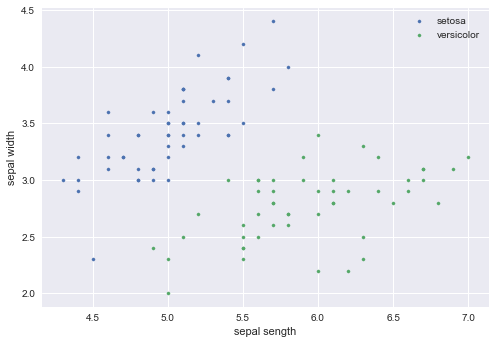

In [23]:
if __name__ == "__main__":
    data = dataset[0:100]
    X = data.iloc[:, :-3]
    y = data.iloc[:, -1]

    setosa = data.loc[y == 0]

    versicolor = data.loc[y == 1]

    plt.scatter(setosa.iloc[:, 0], setosa.iloc[:, 1], s=10, label='setosa')
    plt.scatter(versicolor.iloc[:, 0], versicolor.iloc[:, 1], s=10, label='versicolor')
    plt.xlabel('sepal sength')
    plt.ylabel('sepal width')
    plt.legend()
    plt.style.use('seaborn')
    plt.show()

In [24]:
X = np.c_[np.ones((X.shape[0], 1)), X]
y = np.array(y)[:, np.newaxis]
theta = np.zeros((X.shape[1], 1))

# Model

In [25]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    return np.dot(x, theta)

def probability(theta, x):
    return sigmoid(net_input(theta, x))

In [26]:
def cost_function(theta, x, y):
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(theta, x)) + (1 - y) * np.log(
            1 - probability(theta, x)))
    return total_cost

def gradient(theta, x, y):
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)

In [27]:
np.seterr(all='ignore')

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

In [28]:
def fit(x, y, theta):
    opt_weights = opt.fmin_tnc(func=cost_function, x0=theta,
                  fprime=gradient,args=(x, y.flatten()))
    return opt_weights[0]
parameters = fit(X, y, theta)

In [29]:
parameters

array([-2.06867849,  5.37100887, -8.72280798])

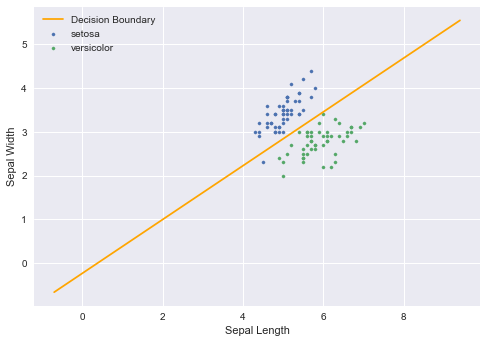

In [30]:
x_values = [np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)]
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

plt.scatter(setosa.iloc[:, 0], setosa.iloc[:, 1], s=10, label='setosa')
plt.scatter(versicolor.iloc[:, 0], versicolor.iloc[:, 1], s=10, label='versicolor')
    

plt.plot(x_values, y_values, label='Decision Boundary', color='orange')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

In [31]:
def predict(x):
    theta = parameters[:, np.newaxis]
    return probability(theta, x)
def accuracy(x, actual_classes, probab_threshold=0.5):
    predicted_classes = (predict(x) >= 
                         probab_threshold).astype(int)
    predicted_classes = predicted_classes.flatten()
    accuracy = np.mean(predicted_classes == actual_classes)
    return accuracy * 100

In [32]:
accuracy(X, y.flatten())

99.0